In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                      mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(mini_pieman.all()), num_factors=100,
                                                  mask='data/pieman_data/wholebrain.nii.gz')

05/23/2018 12:08:30 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/23/2018 12:08:32 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/23/2018 12:08:33 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


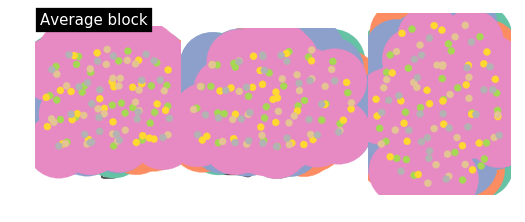

In [6]:
htfa.plot_factor_centers()

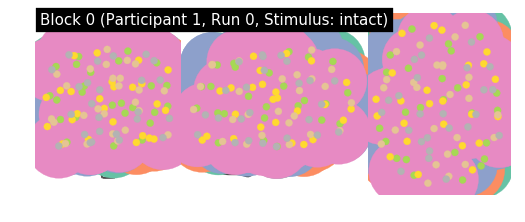

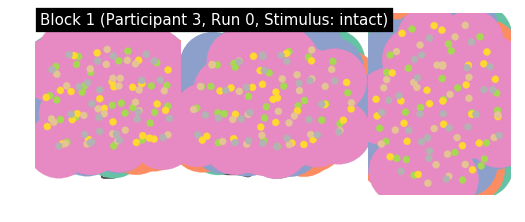

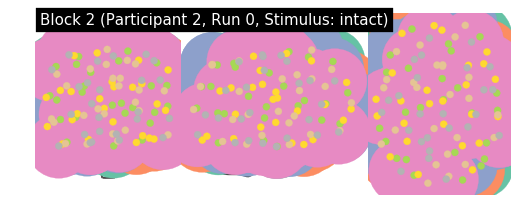

In [7]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)

In [8]:
losses = htfa.train(num_steps=500, learning_rate=1e-1, log_level=logging.INFO, num_particles=2,
                    batch_size=128, use_cuda=True, blocks_batch_size=8)

05/23/2018 12:10:17 [Epoch 1] (1195ms) Posterior free-energy 2.35152736e+11
05/23/2018 12:10:18 [Epoch 2] (986ms) Posterior free-energy 1.78145542e+11
05/23/2018 12:10:19 [Epoch 3] (993ms) Posterior free-energy 1.39045978e+11
05/23/2018 12:10:20 [Epoch 4] (1001ms) Posterior free-energy 1.01688615e+11
05/23/2018 12:10:21 [Epoch 5] (1011ms) Posterior free-energy 7.01784883e+10
05/23/2018 12:10:22 [Epoch 6] (1003ms) Posterior free-energy 5.14266890e+10
05/23/2018 12:10:23 [Epoch 7] (996ms) Posterior free-energy 4.00672645e+10
05/23/2018 12:10:24 [Epoch 8] (1012ms) Posterior free-energy 3.43286333e+10
05/23/2018 12:10:25 [Epoch 9] (1011ms) Posterior free-energy 2.89189294e+10
05/23/2018 12:10:26 [Epoch 10] (1010ms) Posterior free-energy 2.58216571e+10
05/23/2018 12:10:27 [Epoch 11] (995ms) Posterior free-energy 2.33053204e+10
05/23/2018 12:10:28 [Epoch 12] (987ms) Posterior free-energy 2.17494036e+10
05/23/2018 12:10:29 [Epoch 13] (1010ms) Posterior free-energy 2.02842214e+10
05/23/2018 12

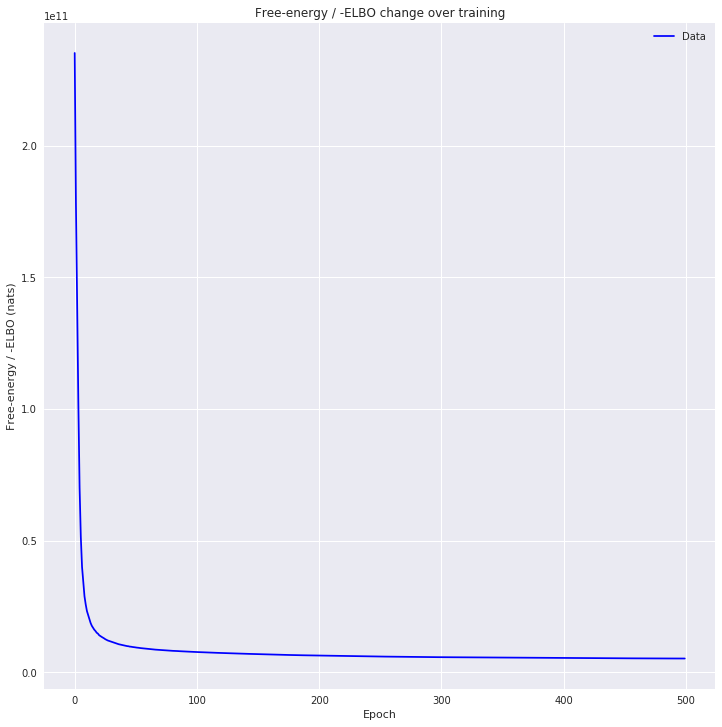

In [9]:
utils.plot_losses(losses)

In [10]:
htfa.normalize_activations()

[10.872537612915039, 9.790372848510742, 8.538802146911621]

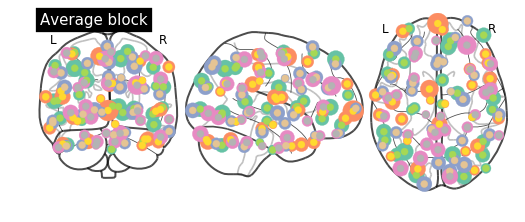

In [11]:
htfa.plot_factor_centers()

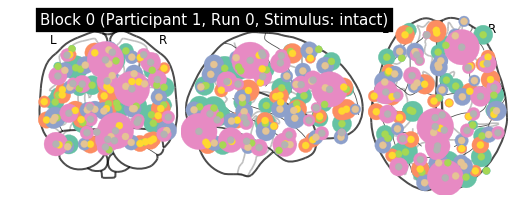

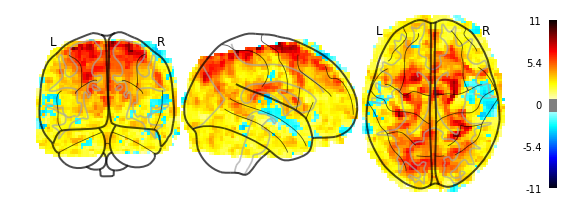

05/23/2018 12:19:29 Reconstruction Error (Frobenius Norm): 4.24484131e+03 out of 5.08479639e+03


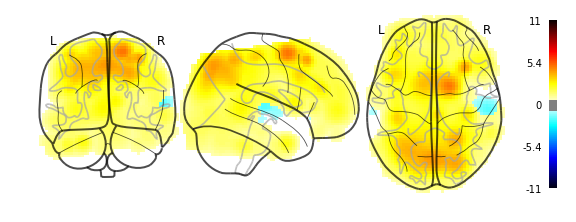

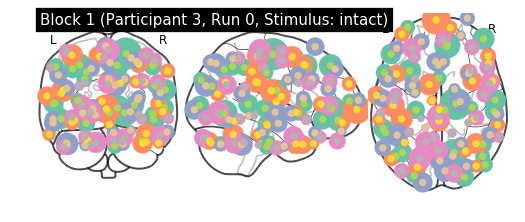

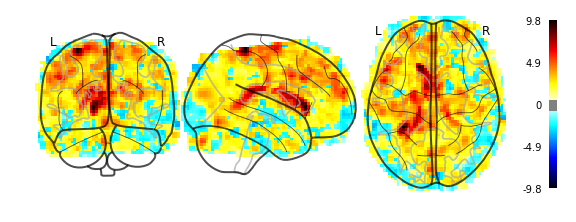

05/23/2018 12:19:56 Reconstruction Error (Frobenius Norm): 4.38838428e+03 out of 5.19534277e+03


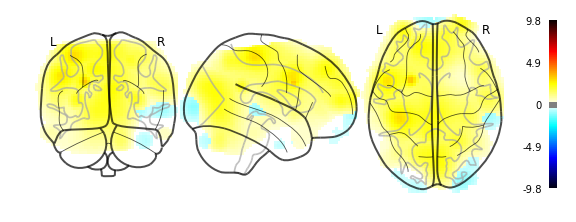

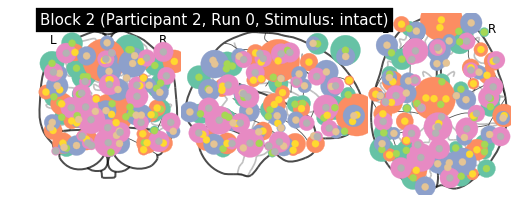

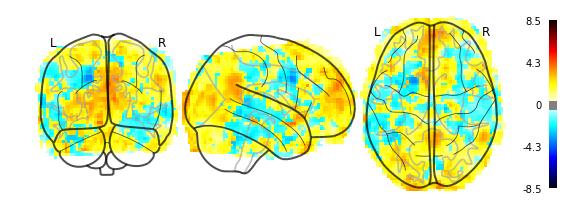

05/23/2018 12:20:24 Reconstruction Error (Frobenius Norm): 4.18194189e+03 out of 5.19534277e+03


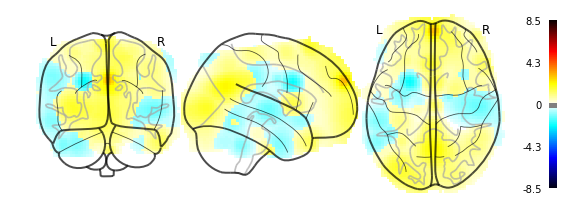

In [12]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)
    htfa.plot_original_brain(block=b)
    htfa.plot_reconstruction(block=b)

In [13]:
htfa.results(0)

{'factor_centers': 
 -52.9095 -52.1682  45.3501
   8.7790   8.9552   6.6549
 -26.7601 -23.9243 -13.7983
  10.2209 -77.9597   2.1373
  46.1731 -49.8004  41.3835
 -52.6478  16.7077  15.1179
  47.3789  56.6174 -14.3528
 -53.9733  33.0392  -8.6250
  29.3513 -93.0801   3.4751
  58.6682  -6.7693  23.3961
 -29.3809 -22.7210  42.3726
   0.0512  38.3780   5.9914
   8.0992  45.5275  51.2150
   0.7205  -9.6242 -42.3856
  18.5265   2.6469  61.6809
 -41.5364 -68.7520 -36.6490
  58.2775 -22.9476   4.8396
 -34.2910 -66.7425  44.0020
 -30.4420  61.3336  22.0476
  50.8853 -86.3873  25.7215
 -55.8164 -47.8994   7.9130
 -17.0298 -87.9773  25.5581
  36.3797 -38.3336 -34.6285
 -38.2606  32.1554  63.8953
  45.4165 -71.6371  -5.4309
 -65.0084 -24.2876 -10.9599
 -28.5918 -53.4587 -10.5321
   2.2655 -41.7995  20.6452
  52.4920  33.1252  -6.4555
  11.6372 -15.0379 -16.9049
  39.1789 -86.5388 -33.8525
 -67.3494  -7.8580   8.2583
  -4.3455 -13.0494  14.3008
  55.1031   9.5217   1.0472
  58.7172 -27.2000  43.4399
